In [1]:
import pandas as pd
import numpy as np
from matplotlib_venn import venn2,venn3
import seaborn as sns
import matplotlib.pyplot as plt
import gpplot as gpp
from zipfile import ZipFile
gpp.set_aesthetics(context='paper')

In [2]:
zip_file = ZipFile('../../Data/Katsano/katsano-sgrna-designs.txt.zip')
katsano_designs = pd.read_table(zip_file.open('katsano-sgrna-designs.txt'))
katsano_chip = pd.read_csv('../../Data/Katsano/katsano_guide_gene_mapping_GENCODE48.csv')

/var/folders/mj/lhpd16ys0cx2wkbhm7s0nfcm0000gp/T/ipykernel_1962/397668495.py:2: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  katsano_designs = pd.read_table(zip_file.open('katsano-sgrna-designs.txt'))


In [3]:
katsano_chip

,TSS Coordinate,Target Gene ID,Target Gene Symbol,Selection Category,sgRNA Sequence
0,chr1:+:65419,ENSG00000186092.7,OR4F5,Ensembl Canonical,ACATCTAGTCCATTCATAAA
1,chr1:+:65419,ENSG00000186092.7,OR4F5,Ensembl Canonical,TACATCTAGTCCATTCATAA
2,chr1:+:65419,ENSG00000186092.7,OR4F5,Ensembl Canonical,AATGAGATGGTTCTATTAGT
3,chr1:+:65419,ENSG00000186092.7,OR4F5,Ensembl Canonical,CCAGTTATGAAGAAGGTAGG
4,chr1:+:65419,ENSG00000186092.7,OR4F5,Ensembl Canonical,CTTCCAGTTATGAAGAAGGT
...,...,...,...,...,...
71989,NaN,ONE_INTERGENIC,ONE_INTERGENIC,Negative Control,GTATACACAGGGGTATATAC
71990,NaN,ONE_INTERGENIC,ONE_INTERGENIC,Negative Control,TCTGAATAGGGGCTACGATA
71991,NaN,ONE_INTERGENIC,ONE_INTERGENIC,Negative Control,GTATCATTGGGACTAATGGT
71992,NaN,ONE_INTERGENIC,ONE_INTERGENIC,Negative Control,CATATATGGGGACTCAATGG


In [4]:
katsano_guides = katsano_chip['sgRNA Sequence'].drop_duplicates()

In [5]:
#subset to guides in chip file (that were intentionally chosen for that particular TSS)
katsano = katsano_designs[(katsano_designs['sgRNA Sequence'].isin(katsano_chip['sgRNA Sequence'])) &
                          (katsano_designs['Pick Order'] <= 3)].copy()

#off-target hit columns get read in as strings, cast as ints
katsano.loc[:,'Off-Target CFD100 Hits'] = katsano['Off-Target CFD100 Hits'].astype(float)
katsano.loc[:,'Off-Target Tier I CFD100 Hits'] = katsano['Off-Target Tier I CFD100 Hits'].astype(float)

katsano['coordinates'] = katsano['Input']

katsano

/var/folders/mj/lhpd16ys0cx2wkbhm7s0nfcm0000gp/T/ipykernel_1962/3179711402.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  katsano.loc[:,'Off-Target CFD100 Hits'] = katsano['Off-Target CFD100 Hits'].astype(float)
/var/folders/mj/lhpd16ys0cx2wkbhm7s0nfcm0000gp/T/ipykernel_1962/3179711402.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  katsano.loc[:,'Off-Target Tier I CFD100 Hits'] = katsano['Off-Target Tier I CFD100 Hits'].astype(float)


,Input,Quota,Target Taxon,Target Gene ID,Target Gene Symbol,Target Alias,CRISPR Mechanism,Target Domain,Reference Sequence,Strand of Target,...,Off-Target CFD100 Hits,Off-Target Tier I CFD100 Hits,On-Target Ruleset,On-Target Efficacy Score,ATAC-seq Score,On-Target Rank,Pick Order,Picking Round,Picking Notes,coordinates
0,chr1:+:65419,4.0,9606,NaN,NaN,chr1:+:65419,CRISPRi,"[TSS-50,TSS+300]",NC_000001.11,+,...,2.0,0.0,RS3i-Chen2013,1.624,0.0,1.0,1.0,4.0,Previously skipped due to: Off-target CFD100 m...,chr1:+:65419
1,chr1:+:65419,4.0,9606,NaN,NaN,chr1:+:65419,CRISPRi,"[TSS-50,TSS+300]",NC_000001.11,+,...,2.0,0.0,RS3i-Chen2013,1.343,0.0,2.0,2.0,4.0,Previously skipped due to: Off-target CFD100 m...,chr1:+:65419
2,chr1:+:65419,4.0,9606,NaN,NaN,chr1:+:65419,CRISPRi,"[TSS-50,TSS+300]",NC_000001.11,+,...,1.0,1.0,RS3i-Chen2013,1.201,0.0,3.0,3.0,7.0,Previously skipped due to: Off-target CFD100 m...,chr1:+:65419
21,chr1:-:451678,4.0,9606,NaN,NaN,chr1:-:451678,CRISPRi,"[TSS-50,TSS+300]",NC_000001.11,-,...,9.0,3.0,RS3i-Chen2013,1.735,0.0,1.0,1.0,7.0,Previously skipped due to: Off-target CFD100 m...,chr1:-:451678
22,chr1:-:451678,4.0,9606,NaN,NaN,chr1:-:451678,CRISPRi,"[TSS-50,TSS+300]",NC_000001.11,-,...,9.0,3.0,RS3i-Chen2013,1.684,0.0,2.0,2.0,7.0,Previously skipped due to: Off-target CFD100 m...,chr1:-:451678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735652,(NEG_CONTROL),NaN,9606,NaN,NaN,NaN,CRISPRi,"[TSS-50,TSS+300]",NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,(NEG_CONTROL)
1735687,(NEG_CONTROL),NaN,9606,NaN,NaN,NaN,CRISPRi,"[TSS-50,TSS+300]",NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,(NEG_CONTROL)
1735698,(NEG_CONTROL),NaN,9606,NaN,NaN,NaN,CRISPRi,"[TSS-50,TSS+300]",NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,(NEG_CONTROL)
1735735,(NEG_CONTROL),NaN,9606,NaN,NaN,NaN,CRISPRi,"[TSS-50,TSS+300]",NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,(NEG_CONTROL)


In [6]:
#subset to information of interest
katsano_unique_guide_info = katsano[['coordinates',
                                     'sgRNA Sequence',
                                     'sgRNA Context Sequence',
                                     'On-Target Efficacy Score']].drop_duplicates()
katsano_unique_guide_info

,coordinates,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score
0,chr1:+:65419,ACATCTAGTCCATTCATAAA,AGGTACATCTAGTCCATTCATAAAGGGCTT,1.624
1,chr1:+:65419,TACATCTAGTCCATTCATAA,CAGGTACATCTAGTCCATTCATAAAGGGCT,1.343
2,chr1:+:65419,AATGAGATGGTTCTATTAGT,TGACAATGAGATGGTTCTATTAGTAGGAAT,1.201
21,chr1:-:451678,TCTGGGACTCACTCATTCAT,TGTTTCTGGGACTCACTCATTCATGGGAGA,1.735
22,chr1:-:451678,GGATGGAGAGAATCACTCAG,CAATGGATGGAGAGAATCACTCAGTGGTAT,1.684
...,...,...,...,...
1735652,(NEG_CONTROL),ATTACCACCATAGTAAACCG,NaN,NaN
1735687,(NEG_CONTROL),TGCACCAATGGACTAACCCC,NaN,NaN
1735698,(NEG_CONTROL),GTGGCTATCAGGCTCTATAT,NaN,NaN
1735735,(NEG_CONTROL),ATATCGGATCCATTCCAACT,NaN,NaN


In [7]:
#get dolcetto guide sequences
dolcetto_setA = pd.read_excel('../../Data/externalData/Dolcetto/sanson_et_al_2018_dolcetto_screens.xlsx',sheet_name = 'SetA sgRNA annotations')
dolcetto_setB = pd.read_excel('../../Data/externalData/Dolcetto/sanson_et_al_2018_dolcetto_screens.xlsx',sheet_name = 'SetB sgRNA annotations')
dolcetto_guides = pd.concat([dolcetto_setA,dolcetto_setB])['sgRNA Sequence'].drop_duplicates()
dolcetto_guides

/opt/miniconda3/envs/crispri/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/opt/miniconda3/envs/crispri/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


0        AAAAAAAAAATACTGAGAGA
1        AAAAAAAAGAGGAGGGACGG
2        AAAAAAAATTTCCTAGCGTG
3        AAAAAAACCAGCCTAGCTCG
4        AAAAAAACTGTCCCGCAACC
                 ...         
57006    TTTGTTGACACATGTGGTGC
57007    TTTGTTGTATAGCTGCAGAT
57008    TTTGTTGTCTATGCCTTTAG
57009    TTTGTTTACTTGGCGAGACT
57010    TTTGTTTCAAAGGGCAGAGA
Name: sgRNA Sequence, Length: 114061, dtype: object

In [11]:
hCRISPRiv2_data = pd.read_excel('../../Data/externalData/hCRISPRiv2/horlbeck_etal_2016_hCRISPRiv2.xlsx',sheet_name = 'hCRISPRi-v2.1')
hCRISPRiv2_data

,sgID,gene,transcript,protospacer sequence,selection rank,predicted score,empirical score,off-target stringency,Sublibrary half
0,[gene_strandtargeted_PAMcoordinate.sgRNAlength...,"[gene targeted by the sgRNA, or ""negative_cont...",[TSS targeted by the sgRNA; see Table S2],[protospacer sequence; 5'G is included whether...,"[for each gene/transcript pair, the order in w...",[predicted score by CRISPRi-v2.1 algorithm],"[empirical activity score, where available]",[stringency level at which sgRNA passed thresh...,[Top5 sgRNAs per TSS or Supp5 sgRNAs to create...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
205284,ZZZ3_+_78148657.23-P1P2,ZZZ3,P1P2,GCAGTAGCGGCCCACGTGAC,6,0.722538,NaN,0,Supp5
205285,ZZZ3_+_78148338.23-P1P2,ZZZ3,P1P2,GGATTCTCGCGGGACCTCGT,7,0.718886,NaN,0,Supp5
205286,ZZZ3_+_78148904.23-P1P2,ZZZ3,P1P2,GCGTGGTGAGGGCCAGACAC,8,0.702701,NaN,0,Supp5
205287,ZZZ3_+_78149013.23-P1P2,ZZZ3,P1P2,GACCCGAGCAAGTGCCGTGG,9,0.691741,NaN,0,Supp5


In [12]:
#get hCRISPRiv2 guide sequences (need to remove prepended G)
hCRISPRiv2_19bp_guides = hCRISPRiv2_data['protospacer sequence'][9:].str[1:].str.upper().drop_duplicates()
hCRISPRiv2_19bp_guides

9         CTCCGGGCGACGTGGAGTG
10        GGGCACCCAGGAGCGGTAG
11        TCCACGTCGCCCGGAGCTG
12        GCAGCGCAGGACGGCATCT
13        AGCAGCTCGAAGGTGACGT
                 ...         
205284    CAGTAGCGGCCCACGTGAC
205285    GATTCTCGCGGGACCTCGT
205286    CGTGGTGAGGGCCAGACAC
205287    ACCCGAGCAAGTGCCGTGG
205288    CGCCGCGGCGCTTCCAGGT
Name: protospacer sequence, Length: 201916, dtype: object

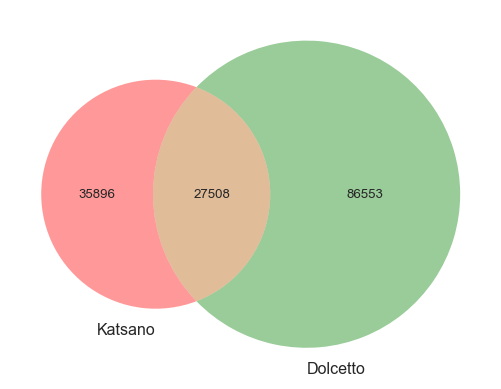

In [13]:
#katsano dolcetto overlap
venn2([set(katsano_guides),set(dolcetto_guides)],
      set_labels=('Katsano', 'Dolcetto'))

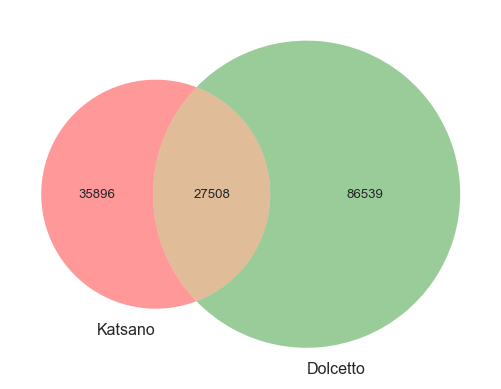

In [14]:
#does it change if we only use the last 19bp of the guide?
katsano_19bp_guides = katsano_guides.str[1:]
dolcetto_19bp_guides = dolcetto_guides.str[1:]
venn2([set(katsano_19bp_guides),set(dolcetto_19bp_guides)],
      set_labels=('Katsano', 'Dolcetto'))

In [15]:
dolcetto_19bp_guides.value_counts().value_counts()

1    114033
2        14
Name: sgRNA Sequence, dtype: int64

There appear to be 14 guides in Dolcetto that have the exact same PAM-proximal 19 nucleotides as another guide, but differ in the first base. This difference is minor so it is worth comparing 19bp sequences instead of 20bp sequences so that hCRISPRiv2 can be included in the comparison.

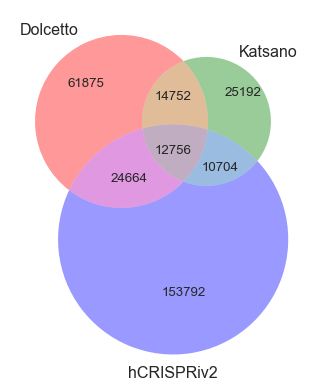

In [17]:
#add in hCRISPRiv2
venn3([set(dolcetto_19bp_guides),set(katsano_19bp_guides),set(hCRISPRiv2_19bp_guides)],
      set_labels=('Dolcetto', 'Katsano','hCRISPRiv2'))
gpp.savefig('../../Figures/Figure 7/katsano_dolcetto_hCRISPRiv2_overlap.pdf',dpi=300, bbox_inches='tight')

### Compare RS3i Scores

In order to obtain RS3i scores with respect to GENCODE48 Ensembl Canonical TSSs for as many Dolcetto and hCRISPRiv2 guides as possible, we performed a CRISPick run with the exact same parameters as the run used to design Katsano, with the exception that we expanded the search window around the TSS to [-100,600].

In [18]:
#read in expanded CRISPick run
zip_file = ZipFile('../../Data/CRISPickRuns/expanded-window-rs3i-sgrna-designs.txt.zip')
expanded_rs3i_designs = pd.read_table(zip_file.open('expanded-window-rs3i-sgrna-designs.txt'))
expanded_rs3i_designs

,Input,Quota,Target Taxon,Target Gene ID,Target Gene Symbol,Target Alias,CRISPR Mechanism,Target Domain,Reference Sequence,Strand of Target,...,Seed Score (v1),Off-Target CFD100 Hits,Off-Target Tier I CFD100 Hits,On-Target Ruleset,On-Target Efficacy Score,ATAC-seq Score,On-Target Rank,Pick Order,Picking Round,Picking Notes
0,chr1:+:65419,1,9606,NaN,NaN,chr1:+:65419,CRISPRi,"[TSS-100,TSS+600]",NC_000001.11,+,...,0.0,2,0,RS3i-Chen2013,1.6240,0.0,1,1.0,4.0,Previously skipped due to: Off-target CFD100 m...
1,chr1:+:65419,1,9606,NaN,NaN,chr1:+:65419,CRISPRi,"[TSS-100,TSS+600]",NC_000001.11,+,...,0.0,2,0,RS3i-Chen2013,1.3430,0.0,2,NaN,NaN,Quota Met; Off-target CFD100 matches > 0
2,chr1:+:65419,1,9606,NaN,NaN,chr1:+:65419,CRISPRi,"[TSS-100,TSS+600]",NC_000001.11,+,...,1.0,1,1,RS3i-Chen2013,1.2010,0.0,3,NaN,NaN,Off-target CFD100 matches > 0; Off-target Tier...
3,chr1:+:65419,1,9606,NaN,NaN,chr1:+:65419,CRISPRi,"[TSS-100,TSS+600]",NC_000001.11,+,...,0.0,2,0,RS3i-Chen2013,1.1990,0.0,4,NaN,NaN,Off-target CFD100 matches > 0; On-Target Effic...
4,chr1:+:65419,1,9606,NaN,NaN,chr1:+:65419,CRISPRi,"[TSS-100,TSS+600]",NC_000001.11,+,...,0.0,2,0,RS3i-Chen2013,0.8731,0.0,5,NaN,NaN,Off-target CFD100 matches > 0; On-Target Effic...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325220,chrY:+:25622162,1,9606,NaN,NaN,chrY:+:25622162,CRISPRi,"[TSS-100,TSS+600]",NC_000024.10,+,...,0.0,8,0,RS3i-Chen2013,-0.4786,0.0,60,NaN,NaN,Off-target CFD100 matches > 0; On-Target Effic...
3325221,chrY:+:25622162,1,9606,NaN,NaN,chrY:+:25622162,CRISPRi,"[TSS-100,TSS+600]",NC_000024.10,+,...,1.0,3,0,RS3i-Chen2013,-0.4795,0.0,61,NaN,NaN,Off-target CFD100 matches > 0; On-Target Effic...
3325222,chrY:+:25622162,1,9606,NaN,NaN,chrY:+:25622162,CRISPRi,"[TSS-100,TSS+600]",NC_000024.10,+,...,1.0,1,0,RS3i-Chen2013,-0.5069,0.0,62,NaN,NaN,Off-target CFD100 matches > 0; On-Target Effic...
3325223,chrY:+:25622162,1,9606,NaN,NaN,chrY:+:25622162,CRISPRi,"[TSS-100,TSS+600]",NC_000024.10,+,...,0.0,3,3,RS3i-Chen2013,-0.5494,0.0,63,NaN,NaN,Off-target CFD100 matches > 0; Off-target Tier...


In [19]:
#get rs3i scores for dolcetto guides
dolcetto = expanded_rs3i_designs[expanded_rs3i_designs['sgRNA Sequence'].isin(dolcetto_guides)].copy()
dolcetto['coordinates'] = dolcetto['Input']
dolcetto_unique_guide_info = dolcetto[['coordinates',
                                     'sgRNA Sequence',
                                     'sgRNA Context Sequence',
                                     'On-Target Efficacy Score']].drop_duplicates()
dolcetto_unique_guide_info

,coordinates,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score
62,chr1:-:451678,GGATGGAGAGAATCACTCAG,CAATGGATGGAGAGAATCACTCAGTGGTAT,1.6840
67,chr1:-:451678,GGCCAGTAGAAAGTACATGG,GACTGGCCAGTAGAAAGTACATGGGGGAGT,1.0630
70,chr1:-:451678,GCACAGAGGAAAACACTAGG,TAGAGCACAGAGGAAAACACTAGGAGGAGG,0.9739
71,chr1:-:451678,ACATGGGGGAGTGTAAGTGA,AAGTACATGGGGGAGTGTAAGTGAGGGTCA,0.9656
74,chr1:-:451678,GCTTGCCACATAGAGCACAG,TAATGCTTGCCACATAGAGCACAGAGGAAA,0.9308
...,...,...,...,...
3325162,chrY:+:25622162,GATTTAGCTACTCTCACCTG,TGTGGATTTAGCTACTCTCACCTGAGGCTA,1.6840
3325169,chrY:+:25622162,AATCCACAGCCCCAACCCTC,GCTAAATCCACAGCCCCAACCCTCTGGTGT,0.9525
3325173,chrY:+:25622162,TGTACTACACCAGAGGGTTG,TTTCTGTACTACACCAGAGGGTTGGGGCTG,0.9279
3325181,chrY:+:25622162,GCTTTCTGTACTACACCAGA,GAAAGCTTTCTGTACTACACCAGAGGGTTG,0.5923


In [20]:
#what percentage of dolcetto guides were we able to obtain RS3i scores for?
dolcetto_guides.isin(dolcetto_unique_guide_info['sgRNA Sequence']).mean()

0.9132832431768966

In [21]:
#get 19bp guide sequences to search for hCRISPRiv2 guides
expanded_rs3i_designs['sgRNA Sequence 19bp'] = expanded_rs3i_designs['sgRNA Sequence'].str[1:]

#get hCRISPRiv2 RS3i scores
hCRISPRiv2 = expanded_rs3i_designs[expanded_rs3i_designs['sgRNA Sequence 19bp'].isin(hCRISPRiv2_19bp_guides)].copy()
hCRISPRiv2['coordinates'] = hCRISPRiv2['Input']
hCRISPRiv2_unique_guide_info = hCRISPRiv2[['coordinates',
                                           'sgRNA Sequence',
                                           'sgRNA Sequence 19bp',
                                           'sgRNA Context Sequence',
                                           'On-Target Efficacy Score']].drop_duplicates()
hCRISPRiv2_unique_guide_info

,coordinates,sgRNA Sequence,sgRNA Sequence 19bp,sgRNA Context Sequence,On-Target Efficacy Score
13,chr1:+:65419,GGAGGTGGGTAAGAAAACAC,GAGGTGGGTAAGAAAACAC,GGAAGGAGGTGGGTAAGAAAACACCGGACC,0.256200
15,chr1:+:65419,ACCGGACCTGGGGAAAGATG,CCGGACCTGGGGAAAGATG,AAACACCGGACCTGGGGAAAGATGGGGAAA,0.183200
18,chr1:+:65419,GTAAGAAAACACCGGACCTG,TAAGAAAACACCGGACCTG,GTGGGTAAGAAAACACCGGACCTGGGGAAA,0.068800
19,chr1:+:65419,GGTATTATAAAAAGGAGGGA,GTATTATAAAAAGGAGGGA,CACTGGTATTATAAAAAGGAGGGAAGGAGG,0.060300
27,chr1:+:65419,TGCTCCAAACCAAGTTTCAC,GCTCCAAACCAAGTTTCAC,GAAATGCTCCAAACCAAGTTTCACTGGTAT,0.004808
...,...,...,...,...,...
3325065,chrY:+:1615164,TGGAACGTGAGTGTGATGAA,GGAACGTGAGTGTGATGAA,ACAATGGAACGTGAGTGTGATGAACGGAAG,0.889000
3325066,chrY:+:1615164,CCACAGAGCGTATCCTACCT,CACAGAGCGTATCCTACCT,TGTCCCACAGAGCGTATCCTACCTGGGACA,0.868600
3325072,chrY:+:1615164,ATACGCTCTGTGGGACAAGG,TACGCTCTGTGGGACAAGG,TAGGATACGCTCTGTGGGACAAGGGGGAAT,0.643600
3325073,chrY:+:1615164,CCTTGAAGCAAGCGCTCCAG,CTTGAAGCAAGCGCTCCAG,TGCTCCTTGAAGCAAGCGCTCCAGAGGCTC,0.608100


In [22]:
#what percentage of dolcetto guides were we able to obtain RS3i scores for?
hCRISPRiv2_19bp_guides.isin(hCRISPRiv2_unique_guide_info['sgRNA Sequence 19bp']).mean()

0.8564105865805582

In [23]:
katsano_unique_guide_info['Library'] = 'Katsano'
dolcetto_unique_guide_info['Library'] = 'Dolcetto'
hCRISPRiv2_unique_guide_info['Library'] = 'hCRISPRiv2'
combined_guide_info = pd.concat([katsano_unique_guide_info,dolcetto_unique_guide_info,hCRISPRiv2_unique_guide_info]).reset_index(drop=True)
combined_guide_info

,coordinates,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,Library,sgRNA Sequence 19bp
0,chr1:+:65419,ACATCTAGTCCATTCATAAA,AGGTACATCTAGTCCATTCATAAAGGGCTT,1.62400,Katsano,NaN
1,chr1:+:65419,TACATCTAGTCCATTCATAA,CAGGTACATCTAGTCCATTCATAAAGGGCT,1.34300,Katsano,NaN
2,chr1:+:65419,AATGAGATGGTTCTATTAGT,TGACAATGAGATGGTTCTATTAGTAGGAAT,1.20100,Katsano,NaN
3,chr1:-:451678,TCTGGGACTCACTCATTCAT,TGTTTCTGGGACTCACTCATTCATGGGAGA,1.73500,Katsano,NaN
4,chr1:-:451678,GGATGGAGAGAATCACTCAG,CAATGGATGGAGAGAATCACTCAGTGGTAT,1.68400,Katsano,NaN
...,...,...,...,...,...,...
374752,chrY:+:1615164,TGGAACGTGAGTGTGATGAA,ACAATGGAACGTGAGTGTGATGAACGGAAG,0.88900,hCRISPRiv2,GGAACGTGAGTGTGATGAA
374753,chrY:+:1615164,CCACAGAGCGTATCCTACCT,TGTCCCACAGAGCGTATCCTACCTGGGACA,0.86860,hCRISPRiv2,CACAGAGCGTATCCTACCT
374754,chrY:+:1615164,ATACGCTCTGTGGGACAAGG,TAGGATACGCTCTGTGGGACAAGGGGGAAT,0.64360,hCRISPRiv2,TACGCTCTGTGGGACAAGG
374755,chrY:+:1615164,CCTTGAAGCAAGCGCTCCAG,TGCTCCTTGAAGCAAGCGCTCCAGAGGCTC,0.60810,hCRISPRiv2,CTTGAAGCAAGCGCTCCAG


In [24]:
#for RS3i scores, we want to subset to Ensembl Canonical TSSs, so merge with Katsano annotations
combined_guide_info_annotated = combined_guide_info.merge(katsano_chip[['TSS Coordinate','Target Gene Symbol','Selection Category']].drop_duplicates(),
                                                          left_on = 'coordinates', right_on = 'TSS Coordinate')
combined_guide_info_canonical = combined_guide_info_annotated[combined_guide_info_annotated['Selection Category'] == 'Ensembl Canonical'].copy()
combined_guide_info_canonical

,coordinates,sgRNA Sequence,sgRNA Context Sequence,On-Target Efficacy Score,Library,sgRNA Sequence 19bp,TSS Coordinate,Target Gene Symbol,Selection Category
0,chr1:+:65419,ACATCTAGTCCATTCATAAA,AGGTACATCTAGTCCATTCATAAAGGGCTT,1.6240,Katsano,NaN,chr1:+:65419,OR4F5,Ensembl Canonical
1,chr1:+:65419,TACATCTAGTCCATTCATAA,CAGGTACATCTAGTCCATTCATAAAGGGCT,1.3430,Katsano,NaN,chr1:+:65419,OR4F5,Ensembl Canonical
2,chr1:+:65419,AATGAGATGGTTCTATTAGT,TGACAATGAGATGGTTCTATTAGTAGGAAT,1.2010,Katsano,NaN,chr1:+:65419,OR4F5,Ensembl Canonical
3,chr1:+:65419,GGAGGTGGGTAAGAAAACAC,GGAAGGAGGTGGGTAAGAAAACACCGGACC,0.2562,hCRISPRiv2,GAGGTGGGTAAGAAAACAC,chr1:+:65419,OR4F5,Ensembl Canonical
4,chr1:+:65419,ACCGGACCTGGGGAAAGATG,AAACACCGGACCTGGGGAAAGATGGGGAAA,0.1832,hCRISPRiv2,CCGGACCTGGGGAAAGATG,chr1:+:65419,OR4F5,Ensembl Canonical
...,...,...,...,...,...,...,...,...,...
345680,KI270728.1:+:1270984,GGTGGAGTCTGGAGGAGGCT,AGCTGGTGGAGTCTGGAGGAGGCTTGGTAC,1.3230,Katsano,NaN,KI270728.1:+:1270984,ENSG00000277836,Ensembl Canonical
345681,KI270728.1:+:1270984,GGCGAACCCAGCTCGTGTAG,GCCTGGCGAACCCAGCTCGTGTAGTGGTTA,0.6387,Katsano,NaN,KI270728.1:+:1270984,ENSG00000277836,Ensembl Canonical
345682,KI270731.1:-:13001,TCGAGAGTTCAAGCAACCGA,GCTCTCGAGAGTTCAAGCAACCGACGGTTC,1.4600,Katsano,NaN,KI270731.1:-:13001,ENSG00000278633,Ensembl Canonical
345683,KI270731.1:-:13001,GAACTCTCGAGAGCTGGGCT,GCTTGAACTCTCGAGAGCTGGGCTCGGAGC,1.3100,Katsano,NaN,KI270731.1:-:13001,ENSG00000278633,Ensembl Canonical


In [25]:
#save rs3i scores corresponding to canonical TSSs
combined_guide_info_canonical.to_csv('../../Data/Katsano/gw_crispri_libraries_rs3i_scored_gencode48_ensembl_canonical.csv',index=False)

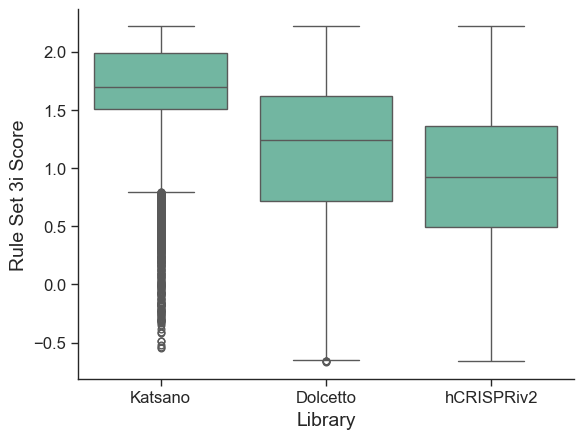

In [30]:
sns.boxplot(data = combined_guide_info_canonical, y = 'On-Target Efficacy Score', x = 'Library',
           order = ['Katsano','Dolcetto','hCRISPRiv2'])
plt.xlabel('Library',fontsize=14)
plt.ylabel('Rule Set 3i Score',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
gpp.savefig('../../Figures/Figure 7/library_comparison_rs3iscore_dist.pdf',bbox_inches='tight',dpi=300)

### Compare Seed Scores

In [23]:
def count_overlapping_matches(seq,pattern):
    count = 0
    length = len(pattern)
    for i in range(len(seq)-1):
        if seq[i:(i+length)] == pattern:
            count +=1
    return count

In [24]:
katsano_guide_df = pd.DataFrame({'sgRNA Sequence':katsano_guides,'Library':'Katsano'})
dolcetto_guide_df = pd.DataFrame({'sgRNA Sequence':dolcetto_guides,'Library':'Dolcetto'})
hCRISPRiv2_guide_df = pd.DataFrame({'sgRNA Sequence':hCRISPRiv2_19bp_guides,'Library':'hCRISPRiv2'})
combined_guide_info = pd.concat([katsano_guide_df,dolcetto_guide_df,hCRISPRiv2_guide_df]).reset_index(drop=True)
combined_guide_info

,sgRNA Sequence,Library
0,ACATCTAGTCCATTCATAAA,Katsano
1,TACATCTAGTCCATTCATAA,Katsano
2,AATGAGATGGTTCTATTAGT,Katsano
3,CCAGTTATGAAGAAGGTAGG,Katsano
4,CTTCCAGTTATGAAGAAGGT,Katsano
...,...,...
379376,CAGTAGCGGCCCACGTGAC,hCRISPRiv2
379377,GATTCTCGCGGGACCTCGT,hCRISPRiv2
379378,CGTGGTGAGGGCCAGACAC,hCRISPRiv2
379379,ACCCGAGCAAGTGCCGTGG,hCRISPRiv2


In [25]:
combined_guide_info['seed_seq'] = combined_guide_info['sgRNA Sequence'].str[-12:]
combined_guide_info['Seed Score'] = combined_guide_info['seed_seq'].apply(lambda seq: count_overlapping_matches(seq,'GG'))
combined_guide_info

,sgRNA Sequence,Library,seed_seq,Seed Score
0,ACATCTAGTCCATTCATAAA,Katsano,TCCATTCATAAA,0
1,TACATCTAGTCCATTCATAA,Katsano,GTCCATTCATAA,0
2,AATGAGATGGTTCTATTAGT,Katsano,GGTTCTATTAGT,1
3,CCAGTTATGAAGAAGGTAGG,Katsano,GAAGAAGGTAGG,2
4,CTTCCAGTTATGAAGAAGGT,Katsano,TATGAAGAAGGT,1
...,...,...,...,...
379376,CAGTAGCGGCCCACGTGAC,hCRISPRiv2,GGCCCACGTGAC,1
379377,GATTCTCGCGGGACCTCGT,hCRISPRiv2,GCGGGACCTCGT,2
379378,CGTGGTGAGGGCCAGACAC,hCRISPRiv2,AGGGCCAGACAC,2
379379,ACCCGAGCAAGTGCCGTGG,hCRISPRiv2,CAAGTGCCGTGG,1


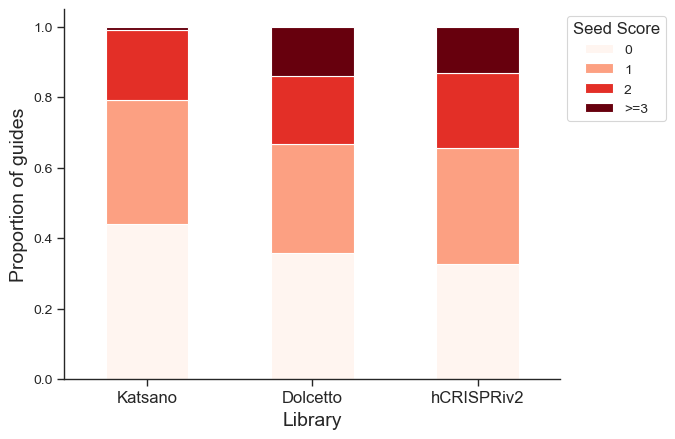

In [26]:
#subset to only columns that matter for seed score and drop duplicates
plot_df = combined_guide_info.copy()
plot_df['Seed Score'] = np.where(plot_df['Seed Score'] >= 3, '>=3', plot_df['Seed Score'])
plot_df = plot_df.groupby(['Library','Seed Score']).agg(num_guides = ('sgRNA Sequence','nunique')).reset_index()
plot_df['total_guides'] = plot_df.groupby('Library')['num_guides'].transform('sum')
plot_df['prop_guides'] = plot_df['num_guides']/plot_df['total_guides']
plot_df = plot_df.pivot(index = 'Library', columns = 'Seed Score', values = 'prop_guides')
plot_df = plot_df.reindex(['Katsano','Dolcetto','hCRISPRiv2'])
plot_df.plot(kind='bar', stacked=True, cmap = 'Reds')

plt.legend(title = 'Seed Score', fontsize=10, title_fontsize=12, bbox_to_anchor = [1,1])
plt.ylabel('Proportion of guides',fontsize=14)
plt.xlabel('Library',fontsize=14)
plt.xticks(rotation=0,fontsize=12)
plt.yticks(fontsize=10)

sns.despine()
gpp.savefig('../../Figures/Figure 7/library_comparison_seed_score_dist.pdf',bbox_inches='tight',dpi=300)

In [27]:
plot_df

Seed Score,0,1,2,>=3
Library,,,,
Katsano,0.440351,0.351066,0.199262,0.009321
Dolcetto,0.358501,0.308256,0.194992,0.138251
hCRISPRiv2,0.326997,0.328711,0.212063,0.132228
